<a href="https://colab.research.google.com/github/Manvi1718/Pytorch/blob/main/Make_Moons_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [303]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import torch
from torch import nn
from sklearn.model_selection import train_test_split

In [304]:
data , target = make_moons(n_samples = 1000,noise=0.15,random_state=5)

In [305]:
data[:5]

array([[ 0.40426991,  0.31361263],
       [ 0.12833891,  0.44289606],
       [ 0.17366878,  0.82149665],
       [ 1.30311002, -0.09242958],
       [-0.11713699,  1.08039328]])

In [306]:
target[:5]

array([1, 1, 0, 0, 0])

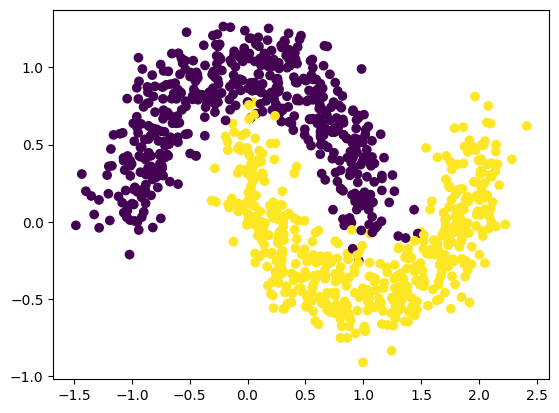

In [307]:
plt.scatter(data[:,0],data[:,1],c = target)

In [356]:
# numpy into tensor 
X = torch.from_numpy(data).type(torch.float)
Y = torch.from_numpy(target).type(torch.float)

In [357]:
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size = 0.25)

In [358]:
X.shape

torch.Size([1000, 2])

In [359]:
x_train.shape

torch.Size([750, 2])

In [360]:
# setup GPU for DL model
device = "cuda" if torch.cuda.is_available() else "cpu"

In [361]:
device

'cpu'

In [368]:
class ModelMoon(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2,out_features=6)
    self.layer_2 =nn.Linear(in_features=6,out_features = 4)
    self.layer_3 =nn.Linear(in_features=4,out_features = 1)
    self.activation = nn.ReLU()
  def forward(self,input_data):
    x = self.activation(self.layer_1(input_data))
    x = self.activation(self.layer_2(x))
    return self.layer_3(x)

In [369]:
# making object
model = ModelMoon().to(device)

In [370]:
model

ModelMoon(
  (layer_1): Linear(in_features=2, out_features=6, bias=True)
  (layer_2): Linear(in_features=6, out_features=4, bias=True)
  (layer_3): Linear(in_features=4, out_features=1, bias=True)
  (activation): ReLU()
)

In [371]:

loss = nn.BCEWithLogitsLoss()

optimizer = torch.optim.Adam(params = model.parameters(),lr = 0.3)

In [372]:
def accuracy(y_true,y_pred):
  correct_classification = torch.eq(y_true,y_pred).sum().item()
  acc = (correct_classification/len(y_pred))*100
  return acc

In [373]:
epochs = 200

x_train,y_train=x_train.to(device),y_train.to(device)
x_test,y_test=x_test.to(device),y_test.to(device)

for epoch in range(epochs):
  model.train()

  y_logits = model(x_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  train_loss = loss(y_logits,y_train)
  acc = accuracy(y_train,y_pred)

  optimizer.zero_grad()
  train_loss.backward()
  optimizer.step()

  model.eval()
  with torch.inference_mode():
    y_pred_test= model(x_test).squeeze()
    test_pred = torch.round(torch.sigmoid(y_pred_test))
    test_loss = loss(y_pred_test,y_test)
    test_acc = accuracy(y_test,test_pred)
  if epoch % 10== 0:
        print(f"epoch :{epoch} | train loss: {train_loss:.4f} | train accuracy : {acc:.2f} | test loss : {test_loss:.4f} | test acc {test_acc:.2f}")



epoch :0 | train loss: 0.6846 | train accuracy : 61.20 | test loss : 0.8724 | test acc 49.60
epoch :10 | train loss: 0.2849 | train accuracy : 87.47 | test loss : 0.2891 | test acc 86.80
epoch :20 | train loss: 0.2313 | train accuracy : 90.27 | test loss : 0.3071 | test acc 86.40
epoch :30 | train loss: 0.2121 | train accuracy : 90.80 | test loss : 0.2970 | test acc 86.00
epoch :40 | train loss: 0.2030 | train accuracy : 91.20 | test loss : 0.3190 | test acc 86.80
epoch :50 | train loss: 0.1928 | train accuracy : 92.00 | test loss : 0.2580 | test acc 88.40
epoch :60 | train loss: 0.1880 | train accuracy : 92.53 | test loss : 0.2745 | test acc 88.80
epoch :70 | train loss: 0.1833 | train accuracy : 92.93 | test loss : 0.2487 | test acc 90.00
epoch :80 | train loss: 0.1806 | train accuracy : 93.07 | test loss : 0.2365 | test acc 91.20
epoch :90 | train loss: 0.1778 | train accuracy : 93.07 | test loss : 0.2372 | test acc 91.20
epoch :100 | train loss: 0.1705 | train accuracy : 93.33 | te

In [374]:
y_train[:5]

tensor([1., 0., 0., 0., 0.])

In [375]:
y_pred[:5]

tensor([1., 0., 0., 0., 0.], grad_fn=<SliceBackward0>)

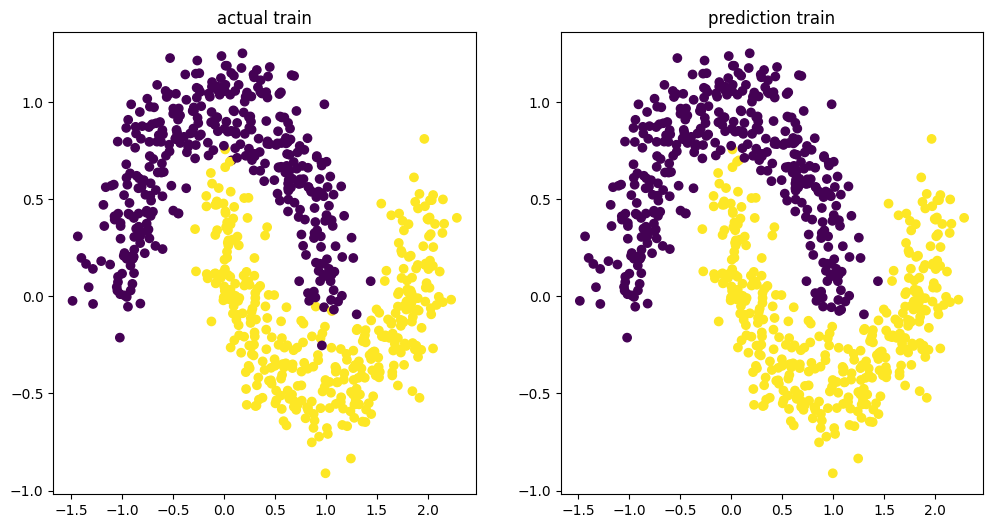

In [376]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("actual train")
plt.scatter(x_train[:,0],x_train[:,1],c = y_train)
plt.subplot(1,2,2)
plt.title("prediction train")
plt.scatter(x_train[:,0],x_train[:,1],c = y_pred.detach().numpy())
plt.show()

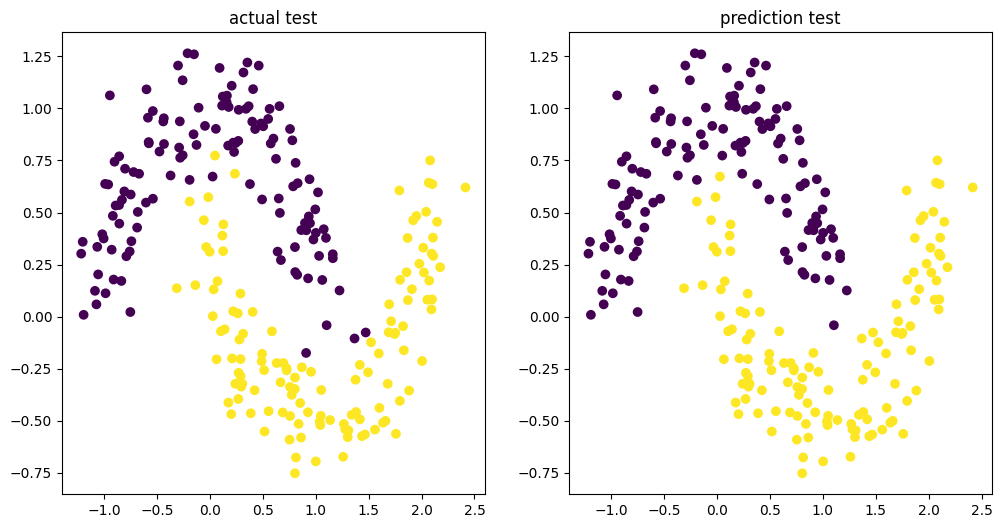

In [377]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("actual test")
plt.scatter(x_test[:,0],x_test[:,1],c = y_test)
plt.subplot(1,2,2)
plt.title("prediction test")
plt.scatter(x_test[:,0],x_test[:,1],c = test_pred.detach().numpy())
plt.show()